### 목표
1.문제정의
   - 500명의 키와 몸무게, 비만도 라벨을 이용하여 비만을 판단하는 모델을 만들어 본다.
   - 머신러닝 과정을 이해한다.

In [1]:
#판다스
import pandas as pd
#넘파이
import numpy as np
#시각화
import matplotlib.pyplot as plt


2.데이터 준비(수집)

In [ ]:
# pd.read_csv('파일 경로 설정')
# data 변수에 담아주기

In [2]:
# ./ : 현재파일이 들어있는 폴더 위치
# Label 을 인덱스로 가져온다.
# Label(답데이터)

data = pd.read_csv('./data/bmi_500.csv', index_col='Label')
data


,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


In [3]:
# 데이터 정보 확인해보기
# 전체 행, 컬럼 정보, 결측치 여부 확인

data.info()

# shape : (500,3)
# 성별컬럼, 키, 몸무게 결측치 없음!
# 데이터 확인 필수! -> 머신러닝 모델은 문자를 이해할 수 없다.
# height, Weight, Lable 값만 활용

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


### 3.데이터 전처리 : pass

### 4. 데이터 분석(탐색)
  - 기술통계 확인 : 평균, 최소, 중앙(오름차준으로 정렬했을 때 정중앙에 있는 값), 최대값
  - 시각화를 통해 데이터의 분포 확인해보기

In [4]:
# describe()
# int, float 컬럼들에 대해서 먼저 작용
# Gender 컬럼이 없어 졌다.
data.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
# 중복없이 Label 확인
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

In [6]:
data.index.value_counts()

Extreme Obesity    198
Obesity            130
Normal              69
Overweight          68
Weak                22
Extremely Weak      13
Name: Label, dtype: int64

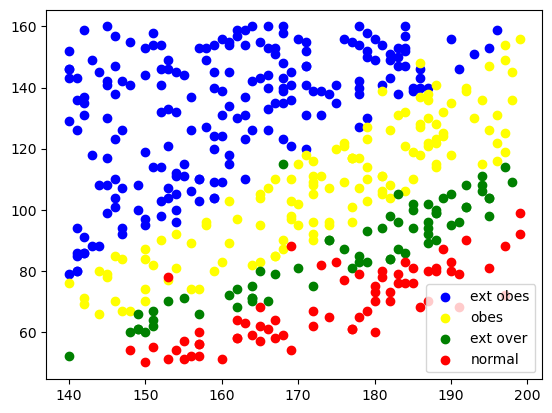

In [7]:
# 시각화 해보기
# x축 키, y측 몸무게를 기준으로 산접도 그려보기
# Extreme Obesity

#data[data.index=='Extreme Obesity']
#data.loc['Extreme Obesity'].shape # (198, 3)
d1=data.loc['Extreme Obesity']
plt.scatter(d1['Height'], d1['Weight'], c='blue', label='ext obes') #d1.loc[:,'Height']

# Obesity 행만 접근해보기
# 산점도 표현해보기
d2=data.loc['Obesity']
plt.scatter(d2['Height'], d2['Weight'], c='yellow', label='obes')

d3=data.loc['Overweight']
plt.scatter(d3['Height'], d3['Weight'], c='green', label='ext over')

d4=data.loc['Normal']
plt.scatter(d4['Height'], d4['Weight'], c='red', label='normal')


plt.legend() #범례표시
plt.show()

In [8]:
# 그래프를 그리는 함수 정의
def bmi_draw(label, color):
    d=data.loc[label]
    plt.scatter(d['Height'], d['Weight'], c=color, label=label)


In [9]:
# label 확인
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

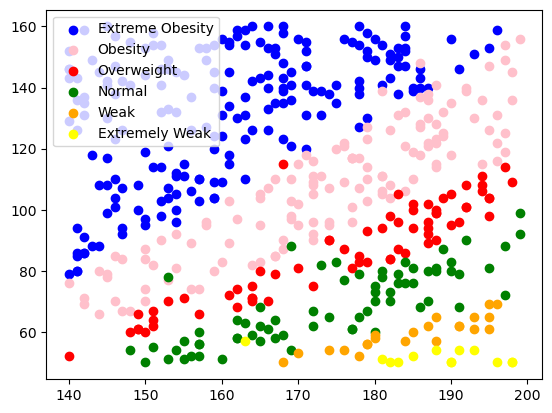

In [10]:
# 함수 호출 및 실행

bmi_draw('Extreme Obesity','blue')
bmi_draw('Obesity','pink')
bmi_draw('Overweight','red')
bmi_draw('Normal','green')
bmi_draw('Weak','orange')
bmi_draw('Extremely Weak','yellow')

plt.legend()
plt.show()

### 5. 모델링
  - 모델 선택 및 하이퍼 파라미터 조정(knn모델 선택)
  - 모델 학습
  - 모델 예측 및 평가

In [11]:
# 문제, 답(컬럼분리)
# 인덱스에 있는 label(답데이터)을 컬럼쪽으로 이동하기
# 컬럼명 확인 df.columns
#data.reset_index().columns

data2 = data.reset_index()
X=data2.loc[:,'Height':'Weight']
y=data2['Label'] # y=data2.loc[:,'Label']

print('문제크기 :', X.shape)
print('답크기 :', y.shape)

문제크기 : (500, 2)
답크기 : (500,)


In [12]:
# 500개의 Data
# train, test 데이터로 분리하는 비율
# 7:3 (7.2:2.5), 8:2
# X_train, y_train, X_test, y_test

X_train = X.iloc[:350]
y_train = y.iloc[:350]
X_test = X.iloc[350:]
y_test = y.iloc[350:]

In [16]:
print('훈련용 데이터 : ',X_train.shape,y_train.shape)
print('테스트용 데이터 : ',X_test.shape,y_test.shape)

훈련용 데이터 :  (350, 2) (350,)
테스트용 데이터 :  (150, 2) (150,)


In [15]:
# 판다스에서
# loc, iloc 인덱서를 사용해야 가능
# df.loc[행,열]
# df.iloc[행,열]

# 행 데이터 접근 
# df.loc[행] , df.loc[값:값] ==> df.loc[행:행]
# df.iloc[행], df.iloc[값:값] ==> df.iloc[행:행]

# 열 데이터 접근
# df.loc[:,열] ,  df.loc[:, 열:열]
# df.iloc[:,열인덱스] ,  df.loc[:, 열인덱스:열인덱스]

# 행,열 접근
# df.loc[시작행:끝행, 시작열:끝열]   
# df.iloc[시작행인덱스:끝행인덱스, 시작열인덱스:끝열인덱스]   

In [ ]:
# 데이터 클래스(카테고리)의 개수는? 6
from sklearn.neighbors import KNeighborsClassifier
# 여섯개중에 한개를 판단하는 것 -> 다중분류
from sklearn.metrics import accuracy_score # 정확도 지표

In [22]:
# knn_model 이라는 변수로 모델 객체 생성
# 사람이 설정하는 매개변수 -> 하이퍼 파라미터
# 이웃의 수 n_neighbors : 5개

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [24]:
# 모델학습
# fit(훈련문제, 훈련답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
# 예측 predict(테스트문제)
pre = knn_model.predict(X_test)
pre

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

In [28]:
# 평가(테스트 답, 예측 값)
# 정확도 지표
accuracy_score(y_test, pre)

0.9066666666666666